In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import xgboost
from xgboost import XGBClassifier

In [ ]:
def var_stats(source):

  # read the source to a dataframe
  source = pd.read_csv(source)

  # stats of source
  d = source.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).T
  d['miss'] = source.isnull().sum()
  d['missrate'] = d['miss']/len(source)

  # export an csv
  d.to_csv('source_sum_year.csv')

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In [ ]:
def imp_rank(source, dataset, varinfo):

  # read the source to a dataframe
  source = pd.read_csv(source)

  X_train = pd.read_csv(dataset)
  y_train = X_train['no_hit']
  X_train = X_train.drop(['Unnamed: 0', 'no_hit'], axis=1)

  # merge source and dataset together
  data = source.merge(X_train, left_on = ['pol_id',	'year'], right_on = ['pol_id',	'year'], how='inner')

  # drop index, categorical
  var = data.drop(['pol_id','year','STATE','ZIP5','ZIP4'], axis=1)

  # impute NA with mean
  var = var.apply(lambda x: x.fillna(x.mean()))

  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 8)) 

  # RandomForest Check
  modelRF = RandomForestClassifier(n_jobs=-1)
  modelRF.fit(var, y_train)
  impRF = modelRF.feature_importances_
  #plt.subplot(1, 2, 1)
  #plot_feature_importance(impRF,var.columns,'RANDOM FOREST')
  # Plot cumulative importance
  
  axes[0].plot(range(1, len(impRF)+1), np.cumsum(impRF))
  axes[0].set_title("Cum_imp_Random Forest")
  

  # XGBoost Check
  modelXG = XGBClassifier()
  modelXG.fit(var, y_train)
  impXG = modelXG.feature_importances_
  #plt.subplot(1, 2, 1)
  #plot_feature_importance(impXG,var.columns,'XGBOOST')
  # Plot cumulative importance
  
  axes[1].plot(range(1, len(impXG)+1), np.cumsum(impXG))
  axes[1].set_title("Cum_imp_XGBoost")
  

  # DecisionTree Check
  modelDT = DecisionTreeClassifier()
  modelDT.fit(var, y_train)
  impDT = modelDT.feature_importances_
  #plt.subplot(1, 2, 1)
  #plot_feature_importance(impDT,var.columns,'DECISION TREES')
  # Plot cumulative importance
  
  axes[2].plot(range(1, len(impDT)+1), np.cumsum(impDT))
  axes[2].set_title("Cum_imp_Decision Trees")
  

  # Lasso coefficient
  modelLS = LogisticRegression(penalty='l1', solver='liblinear')
  modelLS.fit(var, y_train)
  impLS = modelLS.coef_
  #plot_feature_importance(impLS[0],var.columns,'LASSO REGRESSION')

  # append the information to varinfo
  s = pd.read_csv(varinfo)
  s = s.drop([0])
  s['RF_imp'] = impRF
  s['XGB_imp'] = impXG
  s['DT_imp'] = impDT
  s['Lasso_coe'] = impLS[0]
  s['LS_imp'] = (s['Lasso_coe'].abs())/(s['Lasso_coe'].abs().sum())

  

  s.to_csv('importance_year.csv')



In [ ]:
var_stats('C:/Users/94018/Documents/BA886-7/result_final.csv')

C:\Users\94018\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:20:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


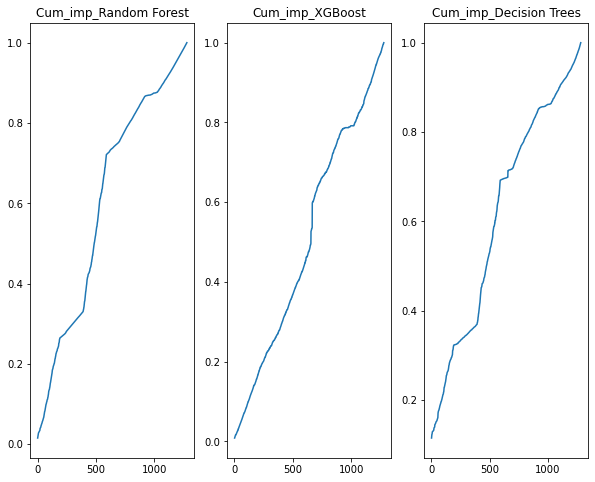

In [ ]:
imp_rank('C:/Users/94018/Documents/BA886-7/result_final.csv','C:/Users/94018/OneDrive/Documents/BA886-7/Data/idyr_train.csv','C:/Users/94018/Documents/BA886-7/source_sum_year.csv')

# test the models

In [ ]:
source1 = pd.read_csv('C:/Users/94018/Documents/BA886-7/result_final.csv')
X_train = pd.read_csv('C:/Users/94018/OneDrive/Documents/BA886-7/Data/idyr_train.csv')
y_train = X_train['no_hit']
X_train = X_train.drop(['Unnamed: 0', 'no_hit'], axis=1)
data1 = source1.merge(X_train, left_on = ['pol_id',	'year'], right_on = ['pol_id',	'year'], how='inner')
var = data1.drop(['pol_id','year','STATE','ZIP5','ZIP4'], axis=1)
var = var.apply(lambda x: x.fillna(x.mean()))

In [ ]:
var.head()

,Unnamed: 0,var0009,var0010,var0011,var0012,var0013,var0014,var0015,var0016,var0017,...,var1089,var1090,var1091,var1092,var1093,var1094,var1095,var1096,var1097,var1098
0,0,1.399839e+13,1.499798e+13,9.912679,1.239086,1.147003,2003.228284,1.212413,1.212413,1.152318,...,0.464817,0.005411,1.610939,0.017109,0.014483,529.444681,16.0833,1.480715,0.494665,1.875034
1,1,1.399839e+13,1.499798e+13,9.912679,1.239086,1.147003,2003.228284,1.212413,1.212413,1.152318,...,0.951674,0.005470,3.179847,0.019704,0.020778,546.633370,14.8333,1.103489,0.933914,1.571223
2,2,1.399839e+13,1.499798e+13,9.912679,1.239086,1.147003,2003.228284,1.212413,1.212413,1.152318,...,0.267688,0.005767,1.267937,0.017109,0.020778,550.908492,16.0834,2.230486,0.294765,1.608837
3,3,1.399839e+13,1.499798e+13,9.912679,1.239086,1.147003,2003.228284,1.212413,1.212413,1.152318,...,1.000840,0.006188,1.307391,0.017109,0.020778,564.666033,14.8333,1.480715,0.980685,1.608837
4,13,1.399839e+13,1.499798e+13,9.912679,1.239086,1.147003,2003.228284,1.212413,1.212413,1.152318,...,3.972740,0.000822,1.424492,0.017109,0.000812,525.395565,4.4583,1.480715,3.946720,1.994516


In [ ]:
X_test = pd.read_csv('C:/Users/94018/OneDrive/Documents/BA886-7/Data/idyr_test.csv')
y_test = X_test['no_hit']
X_test = X_test.drop(['Unnamed: 0', 'no_hit'], axis=1)
data1_t = source1.merge(X_test, left_on = ['pol_id',	'year'], right_on = ['pol_id',	'year'], how='inner')
var_t = data1_t.drop(['pol_id','year','STATE','ZIP5','ZIP4'], axis=1)
var_t = var_t.apply(lambda x: x.fillna(x.mean()))

In [ ]:
var_t.head()

,Unnamed: 0,var0009,var0010,var0011,var0012,var0013,var0014,var0015,var0016,var0017,...,var1089,var1090,var1091,var1092,var1093,var1094,var1095,var1096,var1097,var1098
0,4,1.399840e+13,1.499799e+13,9.862952,1.231345,1.140913,2003.352124,1.212940,1.212940,1.152074,...,2.052881,0.002271,1.390553,0.019262,0.018343,363.864886,58.3333,1.856222,2.134286,1.020104
1,5,1.399840e+13,1.499799e+13,9.862952,1.231345,1.140913,2003.352124,1.212940,1.212940,1.152074,...,2.080835,0.002393,1.104770,0.008518,0.011159,369.518144,57.6250,2.285444,2.083792,1.789574
2,6,1.399840e+13,1.499799e+13,9.862952,1.231345,1.140913,2003.352124,1.212940,1.212940,1.152074,...,0.585359,0.002665,1.551885,0.015429,0.009950,373.557318,54.1668,2.088034,0.575040,0.472868
3,7,1.399840e+13,1.499799e+13,9.862952,1.231345,1.140913,2003.352124,1.212940,1.212940,1.152074,...,0.935220,0.002976,1.105191,0.014436,0.006619,381.002620,47.9998,1.495616,0.921009,1.606041
4,148,1.399811e+13,1.499711e+13,1.000000,1.705242,0.107922,2017.000000,1.587818,1.587818,1.395953,...,0.695146,0.004978,0.834543,0.005689,0.020770,420.688538,53.7918,1.534607,0.685446,1.606041


In [ ]:
# random forest
modelRF = RandomForestClassifier(n_jobs=-1)
modelRF.fit(var, y_train)
RF_pred = modelRF.predict(var_t)
print(accuracy_score(y_test, RF_pred))
print(classification_report(y_test, RF_pred))

0.907992549737098
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     55229
           1       0.34      0.03      0.05      5440

    accuracy                           0.91     60669
   macro avg       0.63      0.51      0.50     60669
weighted avg       0.86      0.91      0.87     60669



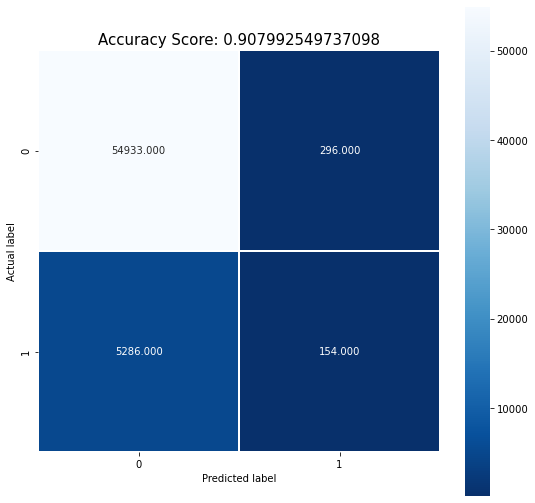

In [ ]:
score = accuracy_score(y_test, RF_pred)
cm = confusion_matrix(y_test, RF_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
# xgboost
modelXG = XGBClassifier()
modelXG.fit(var, y_train)
XG_pred = modelXG.predict(var_t)
print(accuracy_score(y_test, XG_pred))
print(classification_report(y_test, XG_pred))

C:\Users\94018\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9087837280983698
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     55229
           1       0.37      0.02      0.04      5440

    accuracy                           0.91     60669
   macro avg       0.64      0.51      0.50     60669
weighted avg       0.86      0.91      0.87     60669



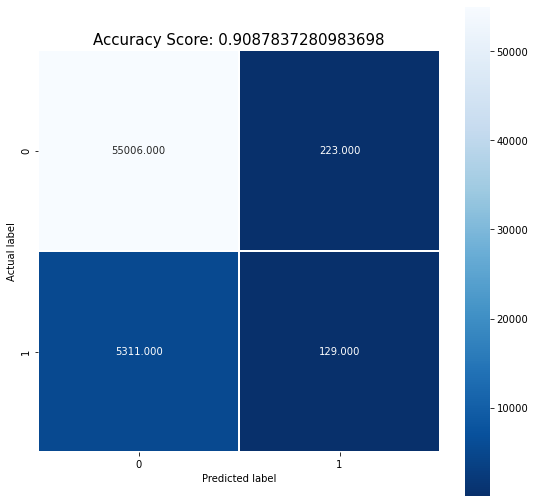

In [ ]:
score = accuracy_score(y_test, XG_pred)
cm = confusion_matrix(y_test, XG_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
# decision tree
modelDT = DecisionTreeClassifier()
modelDT.fit(var, y_train)
DT_pred = modelDT.predict(var_t)
print(accuracy_score(y_test, DT_pred))
print(classification_report(y_test, DT_pred))

0.8297647892663469
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     55229
           1       0.13      0.17      0.15      5440

    accuracy                           0.83     60669
   macro avg       0.53      0.53      0.53     60669
weighted avg       0.85      0.83      0.84     60669



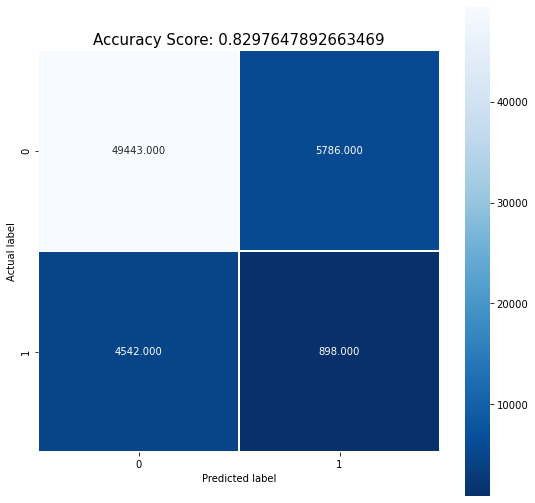

In [ ]:
score = accuracy_score(y_test, DT_pred)
cm = confusion_matrix(y_test, DT_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);